In [1]:
import pandas as pd

In [2]:
dict_data={
    'age':[10,20,30,40],
    'name':['홍','길','동','말자'],
    'math':[70,80,20,11],
    'no':[1,2,1,1]
}
df=  pd.DataFrame(dict_data)

In [3]:
def user_fn(x):
    return {'sum':sum(x),'mean':'사랑합니다'}

In [4]:
df.groupby('no')['age'].agg([user_fn,'count'])

,user_fn,count
no,,
1,"{'sum': 80, 'mean': '사랑합니다'}",3
2,"{'sum': 20, 'mean': '사랑합니다'}",1


In [5]:
for idx , data in df.groupby('no'):
    print('idx:', idx , 'data:',data)

idx: 1 data:    age name  math  no
0   10    홍    70   1
2   30    동    20   1
3   40   말자    11   1
idx: 2 data:    age name  math  no
1   20    길    80   2


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Pmf 는 `Series`

`empiricaldist` 는 Pmf 제공 ,  Pmf 는 확률 질량 함수를 표현하는  Pandas Series
emperical distribution의 약자 (경험적 분산)

Series를 생성하는 방법으로  Pmf 생성할수있고 하나의  sequence로부터 Pmf 만들기 위해 
from_seq를 사용하는 것이 가장 일반적이다 

In [7]:
from empiricaldist import Pmf

In [8]:
d6= Pmf.from_seq([1,2,3,4,5,6],normalize=False)
d6.normalize() #d6 값이 변경됨 

6

기본적으로  확률은 다 더해서 1이 되도록 정규화되었음 

In [9]:
d6.qs

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [10]:
d6.ps

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [11]:
def decorate_dice(title):
    """
        axes  에 레이블링함
        title 은 문자열
    """
    plt.xlabel('outcome')
    plt.ylabel('PMF')
    plt.title(title)

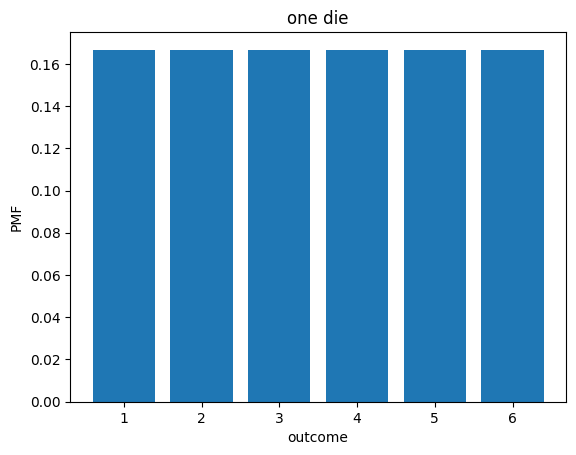

In [12]:
d6.bar()
decorate_dice('one die')
#하나의  bar 마다  pmf 를 표시함 

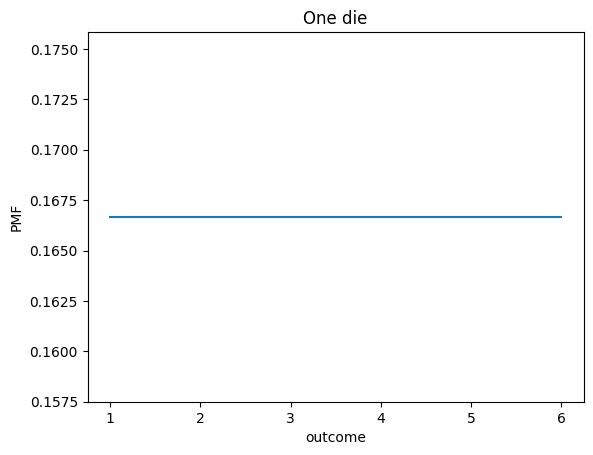

In [13]:
d6.plot()
decorate_dice('One die')

In [14]:
d6[1] #결과 (1) 이 나오는 확률을 반환

0.16666666666666666

In [15]:
d6[6] #결과 (6) 이 나오는 확률을 반환

0.16666666666666666

In [16]:
try:
    d6[7] #결과 (7) 이 나오는 확률을 반환
except KeyError as e:
    print(e)

7


##   수정(Mutation)

In [17]:
d6[7]=1/6
d6.sum()

1.1666666666666665

In [18]:
d6.normalize() #총합이 1 이되도록 조정
d6.sum()

1.0000000000000002

## 통계 (statistics)
Pmf는 정규화 되어있을때만  mean , median을 사용가능

In [19]:
d6 =Pmf.from_seq([1,2,3,4,5,6])
d6.mean()

3.5

In [20]:
d6.std() #standard deviation 

1.707825127659933

In [21]:
d6.var() # 분산  variance

2.9166666666666665

$$ 주사위를 1회 던져 나오는 눈의 수를 관찰하였다고 하자 이때 표본 공간은$$
$$ S ={1,2,3,4,5,6}$$
$$ 이때 사건  A = 짝수의 눈이 나오는 경우 ,사건 B는 3의 배수가 나오는 경우라고 하면$$ 
$$ A = \{2,4,6\} , B=\{3,6\} $$
$$ 이 경우   A \cap B = \{6\}  $$ 
$$  A \cup B =\{2,3,4,6\} $$

###  확률 공리(axiom)
1. 임의의 사건 A  에 대하여  $ P(A) \ge 0  $ 이다 
2.  $ P(S) =1  $
3. 표본 공간  S에 정의된 사건열 $$ A_{1} , A_{2} ,...  이 있다고 하자 이제 모든  i \neq j 에 대하여  A_{i} \cap A_{j} = \emptyset 이면  P( \bigcup_{i=1}^{\infty}A_{i}) 
= \sum_{i=1}^{\infty} P(A_{i})
$$

- 아래의 성질이 성립함
  1)  $ P(A^{c}) = 1- P(A) $
  2)  $ P(\emptyset) = 0  $
  3)  $ A \subset B 이면 P(A) \le P(B) 이다  $
  4)  $ A \cup B =  P(A) +  P(B)  - P(A \cap B)$

##  증명
1)  $$ 1= P(S) = P(A \cup A^{c}) = P(A) +P(A^{c}) $$ 
2)  $$ 0= 1- P(S) = P(S^{c}) = P(\emptyset) $$ 
3)  $$ B= A \cup (B \cap A^{c})로 나타낼수 있으며 A \cap ( B \cap  A^{c}) = \emptyset 이므로  $$ 
    $$ P(B) = P(A) + P(B \cap A^{c}) \ge P(A)  $$  가성립함
4) $$ P(A) = P(A\cap B^{c}) + P(A\cap B)  , P(B) = P(B\cap A^{c}) + P(A\cap B) 이므로   $$ 밴 다이어 그램을 사용하면 자명하다

    $ S^{c} = S의 여집합(complement) $

$$ 두개의 동전을 던졌을때 표본공간 S = \{ HH ,HT, TH ,TT \} 는 4개의 원소로 구성되어 있다  각 원소는 동일 한 확률 \frac{1}{4} 을 갖는다고 하자 이제 첫 번째 동전이 앞면(H) 라는 조건하에서 두개의 동전이 모두 앞면(H)을 조건부 확률을 구해보자 A를 첫번재 동전이 앞면(H) 라는 사건 그리고 B를 두번째 동전이 앞면(H)일 사건이라고 표기하면  $$
$$  P(A \cap B | A) = \frac{P(A \cap B)} {P(A)} $$
=$$ \frac{P \{HH \} }{P \{HH, HT\}} $$
=$$ \frac{\frac{1}{4}}{\frac{1}{2}} $$ 
=$$ \frac{1}{2} $$  을 얻게된다

또 최소한 하나의 동전이 앞면(H) 이라는 조건하에서 둘다 앞면 (H)일 조건부  확률을 구해보자
$$ C를 최소한 하나의 동전이 앞면(H) 이라는 사건 그리고 D를 둘다 앞면(H) 사건이라고 표기하면  $$
$$ P(C \cap D | C) = P(D|C)   $$
=$$ \frac{P \{HH \} }{P \{ HH, HT, TH\}}  $$ 
=$$ \frac{\frac{1}{4}}{\frac{3}{4}} $$ 
=$$ \frac{1}{3} $$  을 얻게된다

이제 조건부 확률의 성질들을 알아보면 ,서로 배반인(exclusive) 두 사건이 $ A_{1} 과 A_{2} 에 대하여 $
$$
    P(A_{1} \cup A_{2} | B) = \frac{P((A_{1} \cup  A_{2}) \cap B)}{P(B)}
$$
$$
= P(A_{1} \cap B)  + P(A_{2} \cap B) ( \because (A_{1} \cap B) \cap (A_{2} \cap B) = \emptyset ) 
$$
=$$ P(A_{1} | B) + P(A_{2} | B) $$
 이 성립하며 이는 두개 이상의 사건인 경우로도 쉽게 확장된다 
 또한 공리  P(A |B)  =0 이며, P(S|B ) = P(B|B) =1 이므로 조건부 확률도 앞의 확률의 공리를 만족함을 알수 있다 따라서  앞의 정리에서 성립했던 확률의 성격들은  조건부 확률에서도 성립한다 즉,
$$ P(A^{c} |B)  = 1-P(A|B) $$
$$ P( \emptyset | B ) = 0 $$
$$ A_{1} \subset A_{2}   이면 P(A_{1}| B) \subset  P(A_{2}| B)   $$
$$  P(A_{1} \cup A_{2} | B) = P(A_{1}| B)  + P(A_{2}| B) -P(A_{1} \cap A_{2} | B)    $$

<img src='./images/XOR.JPG'/>

##  전확률 공식
$$ 사건 B_{1},B_{2},..., B_{k} 는 상호 배반이며  \{ B_{i} \cap B_{j} =\emptyset , i \neq j \}  , \bigcup_{i=1}^{k} B_{i} = S라고 하자 , 이때 임의의 사건 A 에 대하여 
$$
$$ P(A) = \sum_{}^{} P(B_{i}) P(A| B_{i})  $$ 가 성립한다

##  증명
$$ P(A) = P(A \cap S)  = P(A \cap (\bigcup_{i=1}^{k} B_{i}))$$
$$ \sum_{i=1}^{k}P(A \cap B_{i}) = \sum_{i=1}^{k}P(B_{i}) P(A |B_{i} )  $$

##  확률 밀도 함수 및 확률분포 함수 

확률 밀도 함수 f(x)의 조건은 다음과 같다 
-  $$ 모든 실수 x 에 대하여  f(x) \gt 0 이다  $$ 
-  $$ 확률 변수 X 가 가질수 있는 유한 또는 가산 무한개의 값  x_{1} , x_{2}, \cdot \cdot \cdot 에 대하여 f(x_{i}) >0 이며$$ 
$$ \sum_{모든 x_{i}} f(x_{i}) = 1 이다$$
이산형(discrete) 확률변수 X의 확률밀도 함수 F(x)는 F(X=x) = f(x)를 만족하며 이를 확률 질량 함수(probability mass function) 라 부르기도 한다 , 반면 연속형 확률변수는 가질수 있는 값이 셀수 없는 무한개이기 때문에 확률밀도함수가 가능한 값 하나 하나에 확률을 부여하지 않고 구간에 확률을 부여하게 된다 
그래서 연속 형 확률 변수 X의 경우 모든 실수 X에 대하여  P(X=x)  =0 이나 그의확률 밀도 함수 f(x)는 
- $$모든  실수  x 에 대하여  f(x) \gt 0 $$
- $$  \int_{-\infty}^{\infty} f(x) dx = 1  이라는 조건을 만족하며  $$
$$  -\infty < a < b < \infty 일때 \int_{-\infty}^{\infty} f(x) dx = P(a \le X \le b) 로 확률이 주어지게 된다$$ 
종합하면  확률변수 X의 확률 밀도 함수 f(x) 일때 변수 X가 실직선상의 어떤 집합 A(예를 들면 구간 (a ,b] )에 속할 확률은 
$$
 P(X \in A) = \begin{cases}  
     \sum_{x_{i} \in {A} } f(x_{i}) \quad if X 가 이산형일 경우 \\
     \int_{A} f(x) dx   \quad  if X 가 연속형인 경우  
 \end{cases}
$$ 로 주어진다  이와 같이 이산형 확률변수와 연속형 확률변수의 차이는 많은 경우에 합을 나타내는 방법이 $ \sum 와 \int  $  로 다를뿐이다 또한 이는 변수 X가 연속형인 경우  
$$ P(X=a) = \int_{a}^{a} f(x) dx =0 이라는 사실과 도 잘 부합한다 $$

## 문제 풀기 
$$ 구간 (0,3) 에 정의된 함수 f(x) =\frac{x^2}{9} 은 (1) f(x) \ge 0 과  $$
$$,(2) \int_{0}^{3} \frac{x^2}{9} dx = 1을 만족하므로 확률밀도 함수이다 $$
$$ 이제 변수 X의 확률밀도 함수가 f(x) 이면 0 < X 2일 확률은 $$
$$ P(0<X<2) = \int_{0}^{3} \frac{x^2}{9} dx =\frac{8}{27} $$

확률 변수 X 에 대한 확률분포 함수 F(x)는 
$$ F(x) = P(X \le  x)  $$ 으로 정의된다(확률 분포 함수는 확률변수 X가 주어진 점 x 이하인 모든 값을 가질 확률을 누적한다는 점에서 `누적 분포 함수(cumulative distribution function)` 또는 `누적 확률 분포 함수`라고 부르기도 한다)

함수 F(x)가 어떤 확률 변수 X가 누적 분포 함수가 되는 필요충분 조건은 다음과 같다
$$ \lim_{x \rightarrow - \infty}  F(x) = 0$$
$$ \lim_{x \rightarrow  \infty}  F(x) = 1 $$
$$ \lim_{ h  \rightarrow  0^+ } F(x+h) = F(x) $$
$$ a<b  이면 F(b) \le F(b) $$

위와 같은 확률 분포 함수 F(x)는 확률 밀도 함수 f(x)를 사용하여 
$$
  F(x) = \begin{cases}  
     \sum_{x_{i} \ge x {A} } f(x_{i}) \quad if X 가 이산형일 경우 \\
     \int_{ -\infty }^{x} f(t) dt   \quad  if X 가 연속형인 경우  
 \end{cases}
$$  로 나타낼수 있으며 , 
$$ 확률변수  X의 구간 (a , b ] 사이의 값을 가질 확률을 확률
분포 함수를 이용하면  P(a <X \le b) = F(b) -F(a) 로 표현 가능 $$

## 문제 
동전을 3회 독립 반복하여 던졌을 경우 관심 있는 변수  X(=앞면의 수)의 확률밀도 함수  p= 1/2 이라고 가정하면 
$$
  f(x) = \begin{cases}  
     \frac{1}{8} \quad if X 가 0인 경우  \\
     \frac{3}{8} \quad    \quad  if X 가 1 또는 2인 경우  \\ 
     \frac{1}{8} \quad    \quad  if X 가 3인경우
 \end{cases}
$$
 로 주어지고 확률 분포 함수는 

$$
  F(x) = \begin{cases}  
     \ 0  \quad if X < 0인 경우  \\
     \frac{1}{8} \quad    \quad  0 \le x < 1   \\ 
     \frac{4}{8} \quad    \quad  1 \le x < 2  \\ 
     \frac{7}{8} \quad    \quad  2 \le x < 3 \\ 
     1  \quad    \quad  x \ge 3 \\ 
 \end{cases} 로 주어진다
$$

연속형 확률변수 X의 확률 밀도 함수가 

$$
  f(x) = \begin{cases}  
     c(1+x)^{-2}  \quad if X > 0인 경우  \\
     0 \quad    \quad  x \le 0    
 \end{cases}
$$ 주어졌을 때 상수 c의 값을 구해보고 P(1 < X < 2)들 확률 분포 함수를 사용하여 계산해 보자 먼저
$$ \int_{0}^{\infty} f(x) dx = \int_{0}^{\infty} c(1+x)^{-2} = \left[\frac{-c}{1+x} \right]_{0}^{\infty} =1 $$
로부터 c=1이 구해지며, 이에 대한 확률 분포 함수는
$$ F(x) = \int_{-\infty}^{x} f(t) dt = \int_{0}^{x} (1+t)^{-2} dt  $$

$$
  f(x) = \begin{cases}  
     1 - \frac{1}{1+x}  \quad if X > 0인 경우  \\
     0 \quad    \quad  x \le 0    
 \end{cases}
$$ 
이다. 나아가

$$ P(1<X<2) = \int_{1}^{2} f(x) dx = F(2) - F(1) = \frac{2}{3} -\frac{1}{2} = \frac{1}{6} $$

연속 확률변수 X의 확률 밀도 함수가 f(x)이고 확률 분포 함수가 F(x)이면 f(x) = $\frac{d}{dx}F(x) $ 를 만족한다.
`누적 분포함수는 대문자 확률밀도/질량함수는 소문자`